# Solution 

import libraries 

In [128]:
import time
import numpy as np
from tqdm import tqdm
from numpy import random, sqrt, round
from argparse import ArgumentParser, ArgumentDefaultsHelpFormatter, SUPPRESS

## Run time using the isperfect(n) without modification 

#### 1) Try different range of n like 10,100,1000 and decide what function takes more time in terms of time complexity

In [127]:
isperfect_run_time_dict = {}
isperfect_numpy_run_time_dict = {}
getLowUpper_run_time_dict = {}
mysqrt_run_time_dict = {}



def isperfect(n: int ):
    """
        This function is the first helper. It takes an integer n and checks if n has a perfect square root or not.
        If n has a perfect square root, then it returns True and its perfect square root. If not, it returns False and n.
        INPUT: n as an integer.
        OUTPUT: a tuple (bool, int).
        Examples:
        isperfect(0) = (True, 0)

        isperfect(1) = (True, 1)
        isperfect(3) = (False, 3)
        isperfect(16) = (True, 4)
    """
    start_time = time.time()
    if n == 0 or n == 1:
        return (True, n)

    ### BEGIN CODE #####
    for i in range(n) : # Hint: you can use the range, or any sequence type. if you don't remember how it works, have a look at the documentation.
        if i * i == n : # replace None by the appropriate code.
            time_to_process = (time.time() - start_time)*1000
            isperfect_run_time_dict[n] = time_to_process
            return (True, i)
    time_to_process = (time.time() - start_time)*1000
    isperfect_run_time_dict[n] = time_to_process
    return (False, n)
    ### END CODE #####
    
def isperfect_numpy(n):
    """
        This function is the first helper. It takes an integer n and checks if n has a perfect square root or not.
        If n has a perfect square root, then it returns True and its perfect square root. If not, it returns False and n.
        INPUT: n as an integer.
        OUTPUT: a tuple (bool, int).
        Examples:
        isperfect(0) = (True, 0)
        isperfect(1) = (True, 1)
        isperfect(3) = (False, 3)
        isperfect(16) = (True, 4)
    """
    
    if n == 0 or n == 1:
        return (True, n)

    ### BEGIN CODE #####
    start_time = time.time()
    arr = np.arange(n)
    idx = np.where(arr * arr == n)[0]  # find the index of the element that satisfies the condition
    if len(idx) > 0:
        i = arr[idx[0]]  # get the value of the element at that index
        time_to_process = (time.time() - start_time) * 1000
        # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
        isperfect_numpy_run_time_dict[n] = time_to_process
        return (True, i)
    time_to_process = (time.time() - start_time) * 1000
    isperfect_numpy_run_time_dict[n] = time_to_process
    # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
    return (False, n)
        
    



def getLowUpper(n: int):
    """
        This function is the second helper. It takes an integer n and returns the lower and upper perfect square root to n.
        We will use two "while" loops here, but we could have used "for" loops or whatever.
        The first that will catch the first perfect square root is less than the square root of n.
        The second one will catch the first square root greater than the square root of n.
        INPUT: n as an integer.
        OUTPUT: a tuple (minsqrt:int, maxsqrt:int)
        Examples:
        getLowUpper(3) = (1,2)
        getLowUpper(15) = (3,4)
    """
    start_time = time.time()
    i = 1
    ### BEGIN CODE ####
    low = isperfect(n-i)
    upper = isperfect(n+i)

    while not low[0] : ## Hint: look at the second while loop.
        i = i + 1
        low = isperfect(n-i)

    i = 1
    while not upper[0] :
        i += 1
        upper = isperfect(n+i)

    minsqrt, maxsqrt = low[1], upper[1] # Hint: remember what is the output of helper 1.
    time_to_process = (time.time() - start_time)*1000
    getLowUpper_run_time_dict[n] = time_to_process
    ### END CODE ####

    return minsqrt, maxsqrt




def mysqrt(n: int, error_threshold=0.000000001) -> float:
    """
        This function is the main function. It takes an interger n and returns the square root of n.
        We will use here the two helper functions we wrote previously.
        INPUT: n as an integer.
        OUTPUT: a float rst
        Examples:
        mysqrt(3) = 1.7320508076809347
        mysqrt(15) = 3.8729833462275565
    """
    start_time = time.time()
    ### BEGIN CODE ###
    if (n == 0) or (n == 1) : ## Hint: remember to always start by basic case solution. for the square root problem, we have 0 and 1
        return n
    ### END CODE ###



    ### BEGIN CODE ###
    checkup = isperfect(n) # Hint: use the one of the helpers you already coded.
    if checkup[0] : # How to access an element of the tuple?
        return checkup[1] #Choose the right index...
    ### END CODE ###

    iteration = 0 # The variable is used to count the number of times we repeat the instructions in the while loop

    ### BEGING CODE ###
    minsqrt, maxsqrt = getLowUpper(n) #Hint: use the second helper function.

    rst =  (minsqrt + maxsqrt)/2

    while abs( (rst * rst) - n) >= error_threshold :
            if (rst * rst) < n : # Hint: have a look at the first function.
                    minsqrt = rst
            else :
                    maxsqrt = rst
            rst = (minsqrt + maxsqrt)/2
            iteration +=1
    ### END CODE ####
    time_to_process = (time.time() - start_time)*1000
    mysqrt_run_time_dict[n] = time_to_process
    return rst


tart_time = time.time()
for i in tqdm(range(1, 10001)):
      mysqrt(i)
time_to_process = (time.time() - start_time) * 1000 
tqdm.write(f"Time taken to process isperfect for number {i}: {time_to_process:.2f} seconds")


100%|█████████████████████████████████████| 10000/10000 [07:19<00:00, 22.77it/s]

Time taken to process isperfect for number 10000: 45272.24 seconds


#### 2) plot the results 

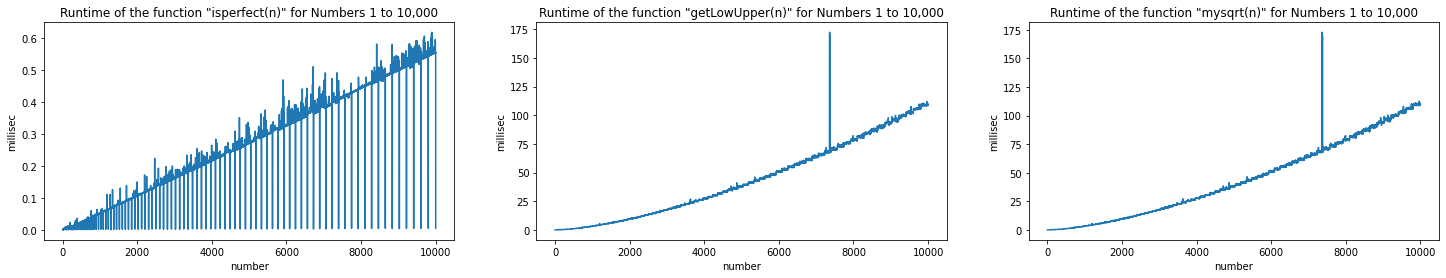

In [129]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 4))

# Plot the data on the subplots
axs[0].plot(isperfect_run_time_dict.keys(), isperfect_run_time_dict.values())
axs[1].plot(getLowUpper_run_time_dict.keys(), getLowUpper_run_time_dict.values())
axs[2].plot(mysqrt_run_time_dict.keys(), mysqrt_run_time_dict.values())

# Add titles and labels to the subplots
axs[0].set_title('Runtime of the function "isperfect(n)" for Numbers 1 to 10,000')
axs[1].set_title('Runtime of the function "getLowUpper(n)" for Numbers 1 to 10,000')
axs[2].set_title('Runtime of the function "mysqrt(n)" for Numbers 1 to 10,000')

axs[0].set_xlabel('number')
axs[1].set_xlabel('number')
axs[2].set_xlabel('number')

axs[0].set_ylabel('millisec')
axs[1].set_ylabel('millisec')
axs[2].set_ylabel('millisec')

# Show the figure
plt.show()

## Run time using numpy version of the is_perfect() method 

#### 1) Try the first 100000 numbers

In [130]:
start_time = time.time()
for i in tqdm(range(1, 100001)):
      isperfect(i)
time_to_process = (time.time() - start_time) / 60
tqdm.write(f"Time taken to process the 'isperfect' function without using numpy arrays for number {i}: {time_to_process:.2f} minutes")
#4.6 minutes 

start_time = time.time()
for i in tqdm(range(1, 100001)):
      isperfect_numpy(i)
time_to_process = (time.time() - start_time) / 60
tqdm.write(f"Time taken to process the 'isperfect' function using numpy arrays for number {i}: {time_to_process:.2f} minutes")
#0.08 minutes 

100%|██████████████████████████████████| 100000/100000 [04:39<00:00, 358.32it/s]


Time taken to process the 'isperfect' function without using numpy arrays for number 100000: 4.65 minutes


100%|████████████████████████████████| 100000/100000 [00:04<00:00, 20451.84it/s]

Time taken to process the 'isperfect' function using numpy arrays for number 100000: 0.08 minutes


In [131]:
isperfect_numpy_run_time_dict = {}
getLowUpper_run_time_dict = {}
mysqrt_run_time_dict = {}

def isperfect_numpy(n):
    """
        This function is the first helper. It takes an integer n and checks if n has a perfect square root or not.
        If n has a perfect square root, then it returns True and its perfect square root. If not, it returns False and n.
        INPUT: n as an integer.
        OUTPUT: a tuple (bool, int).
        Examples:
        isperfect(0) = (True, 0)
        isperfect(1) = (True, 1)
        isperfect(3) = (False, 3)
        isperfect(16) = (True, 4)
    """
    
    if n == 0 or n == 1:
        return (True, n)

    ### BEGIN CODE #####
    start_time = time.time()
    arr = np.arange(n)
    idx = np.where(arr * arr == n)[0]  # find the index of the element that satisfies the condition
    if len(idx) > 0:
        i = arr[idx[0]]  # get the value of the element at that index
        time_to_process = (time.time() - start_time) * 1000
        # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
        isperfect_numpy_run_time_dict[n] = time_to_process
        return (True, i)
    time_to_process = (time.time() - start_time) * 1000
    isperfect_numpy_run_time_dict[n] = time_to_process
    # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
    return (False, n)
        
    



def getLowUpper(n: int):
    """
        This function is the second helper. It takes an integer n and returns the lower and upper perfect square root to n.
        We will use two "while" loops here, but we could have used "for" loops or whatever.
        The first that will catch the first perfect square root is less than the square root of n.
        The second one will catch the first square root greater than the square root of n.
        INPUT: n as an integer.
        OUTPUT: a tuple (minsqrt:int, maxsqrt:int)
        Examples:
        getLowUpper(3) = (1,2)
        getLowUpper(15) = (3,4)
    """
    start_time = time.time()
    i = 1
    ### BEGIN CODE ####
    low = isperfect_numpy(n-i)
    upper = isperfect_numpy(n+i)

    while not low[0] : ## Hint: look at the second while loop.
        i = i + 1
        low = isperfect_numpy(n-i)

    i = 1
    while not upper[0] :
        i += 1
        upper = isperfect_numpy(n+i)

    minsqrt, maxsqrt = low[1], upper[1] # Hint: remember what is the output of helper 1.
    time_to_process = (time.time() - start_time)*1000
    getLowUpper_run_time_dict[n] = time_to_process
    ### END CODE ####

    return minsqrt, maxsqrt




def mysqrt(n: int, error_threshold=0.000000001) -> float:
    """
        This function is the main function. It takes an interger n and returns the square root of n.
        We will use here the two helper functions we wrote previously.
        INPUT: n as an integer.
        OUTPUT: a float rst
        Examples:
        mysqrt(3) = 1.7320508076809347
        mysqrt(15) = 3.8729833462275565
    """
    start_time = time.time()
    ### BEGIN CODE ###
    if (n == 0) or (n == 1) : ## Hint: remember to always start by basic case solution. for the square root problem, we have 0 and 1
        return n
    ### END CODE ###



    ### BEGIN CODE ###
    checkup = isperfect_numpy(n) # Hint: use the one of the helpers you already coded.
    if checkup[0] : # How to access an element of the tuple?
        return checkup[1] #Choose the right index...
    ### END CODE ###

    iteration = 0 # The variable is used to count the number of times we repeat the instructions in the while loop

    ### BEGING CODE ###
    minsqrt, maxsqrt = getLowUpper(n) #Hint: use the second helper function.

    rst =  (minsqrt + maxsqrt)/2

    while abs( (rst * rst) - n) >= error_threshold :
            if (rst * rst) < n : # Hint: have a look at the first function.
                    minsqrt = rst
            else :
                    maxsqrt = rst
            rst = (minsqrt + maxsqrt)/2
            iteration +=1
    ### END CODE ####
    time_to_process = (time.time() - start_time)*1000
    mysqrt_run_time_dict[n] = time_to_process
    return rst



start_time = time.time()
for i in tqdm(range(1, 10001)):
      mysqrt(i)
time_to_process = (time.time() - start_time)  
tqdm.write(f"Time taken to process isperfect for number {i}: {time_to_process:.2f} seconds")
# it took just 12 seconds

100%|████████████████████████████████████| 10000/10000 [00:12<00:00, 779.85it/s]

Time taken to process isperfect for number 10000: 12.83 seconds


#### 2) plot the results 

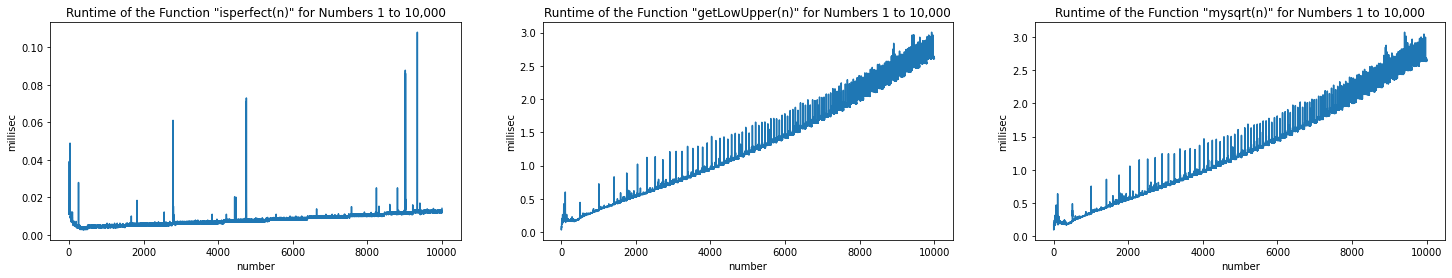

In [132]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 4))

# Plot the data on the subplots
axs[0].plot(isperfect_numpy_run_time_dict.keys(), isperfect_numpy_run_time_dict.values())
axs[1].plot(getLowUpper_run_time_dict.keys(), getLowUpper_run_time_dict.values())
axs[2].plot(mysqrt_run_time_dict.keys(), mysqrt_run_time_dict.values())

# Add titles and labels to the subplots
axs[0].set_title('Runtime of the Function "isperfect(n)" for Numbers 1 to 10,000')
axs[1].set_title('Runtime of the Function "getLowUpper(n)" for Numbers 1 to 10,000')
axs[2].set_title('Runtime of the Function "mysqrt(n)" for Numbers 1 to 10,000')

axs[0].set_xlabel('number')
axs[1].set_xlabel('number')
axs[2].set_xlabel('number')

axs[0].set_ylabel('millisec')
axs[1].set_ylabel('millisec')
axs[2].set_ylabel('millisec')

# Show the figure
plt.show()

# Run time using numpy version of the is_perfect() method and additional improvments 

#### 1) Try the first 100000 numbers

In [ ]:
isperfect_numpy_run_time_dict = {}
getLowUpper_run_time_dict = {}
mysqrt_run_time_dict = {}

def isperfect_numpy(n):
    """
        This function is the first helper. It takes an integer n and checks if n has a perfect square root or not.
        If n has a perfect square root, then it returns True and its perfect square root. If not, it returns False and n.
        INPUT: n as an integer.
        OUTPUT: a tuple (bool, int).
        Examples:
        isperfect(0) = (True, 0)
        isperfect(1) = (True, 1)
        isperfect(3) = (False, 3)
        isperfect(16) = (True, 4)
    """
    
    start_time = time.time()
    if n== 0 or n== 1:
        time_to_process = (time.time() - start_time)*1000  
        isperfect_numpy_run_time_dict[n] = time_to_process
        #print("Time taken by my_function: {:.15f} seconds".format(time.time() - start_time))
        return (True, n)

    # A perfect suqare root always ends with one of these numbers(0,1,4,5,9) and if it does not , then
    # n is not a perfect square
    last_digit = n % 10
    if last_digit not in [0, 1, 4, 5, 6, 9]:
        time_to_process = (time.time() - start_time)*1000  
        isperfect_numpy_run_time_dict[n] = time_to_process
        return (False,n)

    else:
        # A perfect square root always has digital summation of one of these numbers (1,4,7,9) and
        # if it does not , then it is not a perfect square root
        digits = [ int(d) for d in str(n)]
        while len(digits) > 1:
              digits = [int(d) for d in str(sum(digits))]
        if digits[0] not in [1,4,7,9]:
            time_to_process = (time.time() - start_time)*1000  
            isperfect_numpy_run_time_dict[n] = time_to_process
            return (False,n)

        else:
            # We know now that the given "n" might be a perfect square root , but WE ARE NOT SURE YET
            arr = np.arange(n)
            idx = np.where(arr * arr == n)[0]  # find the index of the element that satisfies the condition
            if len(idx) > 0:
                i = arr[idx[0]]  # get the value of the element at that index
                time_to_process = (time.time() - start_time) * 1000
                # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
                isperfect_numpy_run_time_dict[n] = time_to_process
                return (True, i)
            time_to_process = (time.time() - start_time) * 1000
            isperfect_numpy_run_time_dict[n] = time_to_process
            # print("Time taken by my_function: {:.6f} seconds".format(time_to_process))
            return (False, n)

    



def getLowUpper(n: int):
    """
        This function is the second helper. It takes an integer n and returns the lower and upper perfect square root to n.
        We will use two "while" loops here, but we could have used "for" loops or whatever.
        The first that will catch the first perfect square root is less than the square root of n.
        The second one will catch the first square root greater than the square root of n.
        INPUT: n as an integer.
        OUTPUT: a tuple (minsqrt:int, maxsqrt:int)
        Examples:
        getLowUpper(3) = (1,2)
        getLowUpper(15) = (3,4)
    """
    start_time = time.time()
    i = 1
    ### BEGIN CODE ####
    low = isperfect_numpy(n-i)
    upper = isperfect_numpy(n+i)

    while not low[0] : ## Hint: look at the second while loop.
        i = i + 1
        low = isperfect_numpy(n-i)

    i = 1
    while not upper[0] :
        i += 1
        upper = isperfect_numpy(n+i)

    minsqrt, maxsqrt = low[1], upper[1] # Hint: remember what is the output of helper 1.
    time_to_process = (time.time() - start_time)*1000
    getLowUpper_run_time_dict[n] = time_to_process
    ### END CODE ####

    return minsqrt, maxsqrt




def mysqrt(n: int, error_threshold=0.000000001) -> float:
    """
        This function is the main function. It takes an interger n and returns the square root of n.
        We will use here the two helper functions we wrote previously.
        INPUT: n as an integer.
        OUTPUT: a float rst
        Examples:
        mysqrt(3) = 1.7320508076809347
        mysqrt(15) = 3.8729833462275565
    """
    start_time = time.time()
    ### BEGIN CODE ###
    if (n == 0) or (n == 1) : ## Hint: remember to always start by basic case solution. for the square root problem, we have 0 and 1
        return n
    ### END CODE ###



    ### BEGIN CODE ###
    checkup = isperfect_numpy(n) # Hint: use the one of the helpers you already coded.
    if checkup[0] : # How to access an element of the tuple?
        return checkup[1] #Choose the right index...
    ### END CODE ###

    iteration = 0 # The variable is used to count the number of times we repeat the instructions in the while loop

    ### BEGING CODE ###
    minsqrt, maxsqrt = getLowUpper(n) #Hint: use the second helper function.

    rst =  (minsqrt + maxsqrt)/2

    while abs( (rst * rst) - n) >= error_threshold :
            if (rst * rst) < n : # Hint: have a look at the first function.
                    minsqrt = rst
            else :
                    maxsqrt = rst
            rst = (minsqrt + maxsqrt)/2
            iteration +=1
    ### END CODE ####
    time_to_process = (time.time() - start_time)*1000
    mysqrt_run_time_dict[n] = time_to_process
    return rst



start_time = time.time()
for i in tqdm(range(1, 10001)):
      mysqrt(i)
time_to_process = (time.time() - start_time)  
tqdm.write(f"Time taken to process isperfect for number {i}: {time_to_process:.2f} seconds")
# it took just 5 seconds 

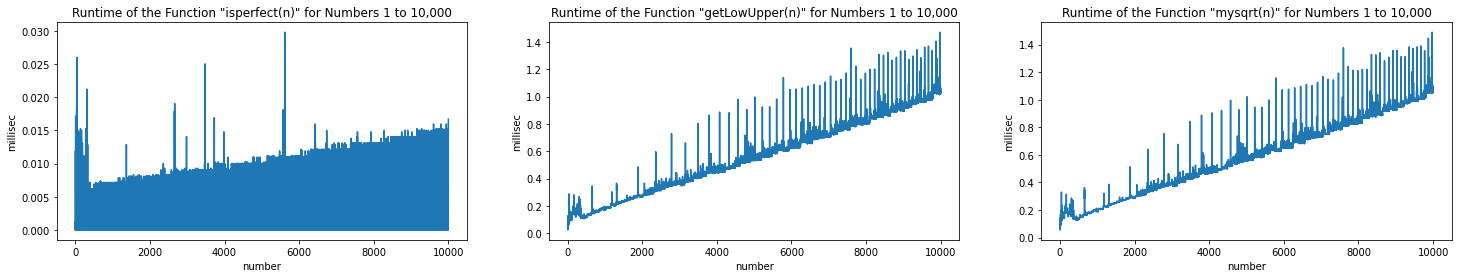

In [137]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 4))

# Plot the data on the subplots
axs[0].plot(isperfect_numpy_run_time_dict.keys(), isperfect_numpy_run_time_dict.values())
axs[1].plot(getLowUpper_run_time_dict.keys(), getLowUpper_run_time_dict.values())
axs[2].plot(mysqrt_run_time_dict.keys(), mysqrt_run_time_dict.values())

# Add titles and labels to the subplots
axs[0].set_title('Runtime of the Function "isperfect(n)" for Numbers 1 to 10,000')
axs[1].set_title('Runtime of the Function "getLowUpper(n)" for Numbers 1 to 10,000')
axs[2].set_title('Runtime of the Function "mysqrt(n)" for Numbers 1 to 10,000')

axs[0].set_xlabel('number')
axs[1].set_xlabel('number')
axs[2].set_xlabel('number')

axs[0].set_ylabel('millisec')
axs[1].set_ylabel('millisec')
axs[2].set_ylabel('millisec')

# Show the figure
plt.show()

# Binary search with addional rules 

#### 1) Try the first 10000 numbers

In [138]:
isperfect_binary_search_run_time_dict = {}
getLowUpper_run_time_dict = {}
mysqrt_run_time_dict = {}

def isperfect_numpy(n):
    """
        This function is the first helper. It takes an integer n and checks if n has a perfect square root or not.
        If n has a perfect square root, then it returns True and its perfect square root. If not, it returns False and n.
        INPUT: n as an integer.
        OUTPUT: a tuple (bool, int).
        Examples:
        isperfect(0) = (True, 0)
        isperfect(1) = (True, 1)
        isperfect(3) = (False, 3)
        isperfect(16) = (True, 4)
    """
    
    start_time = time.time()
    if n== 0 or n== 1:
        time_to_process = (time.time() - start_time)*1000  
        isperfect_binary_search_run_time_dict[n] = time_to_process
        #print("Time taken by my_function: {:.15f} seconds".format(time.time() - start_time))
        return (True, n)

    # A perfect suqare root always ends with one of these numbers(0,1,4,5,9) and if it does not , then
    # n is not a perfect square
    last_digit = n % 10
    if last_digit not in [0, 1, 4, 5, 6, 9]:
        time_to_process = (time.time() - start_time)*1000  
        isperfect_binary_search_run_time_dict[n] = time_to_process
        return (False,n)

    else:
        # A perfect square root always has digital summation of one of these numbers (1,4,7,9) and
        # if it does not , then it is not a perfect square root
        digits = [ int(d) for d in str(n)]
        while len(digits) > 1:
              digits = [int(d) for d in str(sum(digits))]
        if digits[0] not in [1,4,7,9]:
            time_to_process = (time.time() - start_time)*1000  
            isperfect_binary_search_run_time_dict[n] = time_to_process
            return (False,n)

        else:
            # We know now that the given "n" might be a perfect square root , but WE ARE NOT SURE YET
            left = 1
            right = n

            while left <= right:
                mid = (left + right) // 2
                if mid * mid == n:
                    time_to_process = (time.time() - start_time)*1000    
                    isperfect_numpy_run_time_dict[n] = time_to_process
                    return True,mid
                elif mid * mid < n:
                    left = mid + 1
                else:
                    right = mid - 1
            time_to_process = (time.time() - start_time)*1000 
            isperfect_binary_search_run_time_dict[n] = time_to_process
            return (False,n)

    



def getLowUpper(n: int):
    """
        This function is the second helper. It takes an integer n and returns the lower and upper perfect square root to n.
        We will use two "while" loops here, but we could have used "for" loops or whatever.
        The first that will catch the first perfect square root is less than the square root of n.
        The second one will catch the first square root greater than the square root of n.
        INPUT: n as an integer.
        OUTPUT: a tuple (minsqrt:int, maxsqrt:int)
        Examples:
        getLowUpper(3) = (1,2)
        getLowUpper(15) = (3,4)
    """
    start_time = time.time()
    i = 1
    ### BEGIN CODE ####
    low = isperfect_numpy(n-i)
    upper = isperfect_numpy(n+i)

    while not low[0] : ## Hint: look at the second while loop.
        i = i + 1
        low = isperfect_numpy(n-i)

    i = 1
    while not upper[0] :
        i += 1
        upper = isperfect_numpy(n+i)

    minsqrt, maxsqrt = low[1], upper[1] # Hint: remember what is the output of helper 1.
    time_to_process = (time.time() - start_time)*1000
    getLowUpper_run_time_dict[n] = time_to_process
    ### END CODE ####

    return minsqrt, maxsqrt




def mysqrt(n: int, error_threshold=0.000000001) -> float:
    """
        This function is the main function. It takes an interger n and returns the square root of n.
        We will use here the two helper functions we wrote previously.
        INPUT: n as an integer.
        OUTPUT: a float rst
        Examples:
        mysqrt(3) = 1.7320508076809347
        mysqrt(15) = 3.8729833462275565
    """
    start_time = time.time()
    ### BEGIN CODE ###
    if (n == 0) or (n == 1) : ## Hint: remember to always start by basic case solution. for the square root problem, we have 0 and 1
        return n
    ### END CODE ###



    ### BEGIN CODE ###
    checkup = isperfect_numpy(n) # Hint: use the one of the helpers you already coded.
    if checkup[0] : # How to access an element of the tuple?
        return checkup[1] #Choose the right index...
    ### END CODE ###

    iteration = 0 # The variable is used to count the number of times we repeat the instructions in the while loop

    ### BEGING CODE ###
    minsqrt, maxsqrt = getLowUpper(n) #Hint: use the second helper function.

    rst =  (minsqrt + maxsqrt)/2

    while abs( (rst * rst) - n) >= error_threshold :
            if (rst * rst) < n : # Hint: have a look at the first function.
                    minsqrt = rst
            else :
                    maxsqrt = rst
            rst = (minsqrt + maxsqrt)/2
            iteration +=1
    ### END CODE ####
    time_to_process = (time.time() - start_time)*1000
    mysqrt_run_time_dict[n] = time_to_process
    return rst



start_time = time.time()
for i in tqdm(range(1, 10001)):
      mysqrt(i)
time_to_process = (time.time() - start_time)  
tqdm.write(f"Time taken to process isperfect for number {i}: {time_to_process:.2f} seconds")
# it took just 5 seconds 

100%|███████████████████████████████████| 10000/10000 [00:02<00:00, 3548.33it/s]

Time taken to process isperfect for number 10000: 2.82 seconds


#### 2) plot the results 

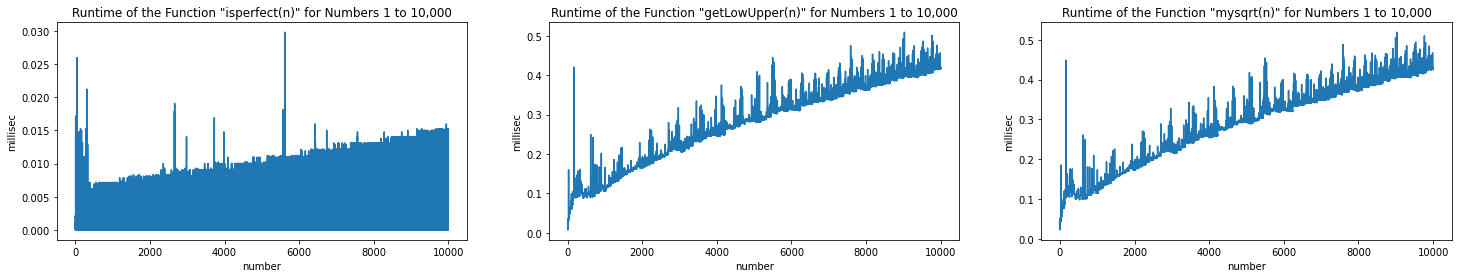

In [139]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 4))

# Plot the data on the subplots
axs[0].plot(isperfect_numpy_run_time_dict.keys(), isperfect_numpy_run_time_dict.values())
axs[1].plot(getLowUpper_run_time_dict.keys(), getLowUpper_run_time_dict.values())
axs[2].plot(mysqrt_run_time_dict.keys(), mysqrt_run_time_dict.values())

# Add titles and labels to the subplots
axs[0].set_title('Runtime of the Function "isperfect(n)" for Numbers 1 to 10,000')
axs[1].set_title('Runtime of the Function "getLowUpper(n)" for Numbers 1 to 10,000')
axs[2].set_title('Runtime of the Function "mysqrt(n)" for Numbers 1 to 10,000')

axs[0].set_xlabel('number')
axs[1].set_xlabel('number')
axs[2].set_xlabel('number')

axs[0].set_ylabel('millisec')
axs[1].set_ylabel('millisec')
axs[2].set_ylabel('millisec')

# Show the figure
plt.show()